```
- 코로나 이후로 따릉이에 대한 이용량은 어떻게 변했을까
    - 재택근무의 확대로 횟수가 적어졌을지, 대중교통 이용 불안감으로 이용량이 늘었을지,
```

# import

In [137]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib import font_manager
import warnings
warnings.filterwarnings(action='ignore')
import datetime
import time

%matplotlib inline
f_path = "/Library/Fonts/Arial Unicode.ttf"
font_manager.FontProperties(fname=f_path).get_name()
plt.rcParams['font.family'] = 'AppleGothic'


# 19년 전체 데이터 불러오기

In [76]:
file_list_2019 = [
'서울특별시 공공자전거 대여정보_2019.6.csv',
'서울특별시 공공자전거 대여정보_2019.7.csv',
'서울특별시 공공자전거 대여정보_2019.8.csv',
'서울특별시 공공자전거 대여정보_2019.9.csv',
'서울특별시 공공자전거 대여정보_2019.10.csv',
'서울특별시 공공자전거 대여정보_2019.11.csv',
'서울특별시 공공자전거 대여정보_2019.12.csv',
'서울특별시 공공자전거 대여정보_2019.01.csv',
'서울특별시 공공자전거 대여정보_2019.02.csv',
'서울특별시 공공자전거 대여정보_2019.03.csv',
'서울특별시 공공자전거 대여정보_2019.04.csv',
'서울특별시 공공자전거 대여정보_2019.05.csv']
file_list_2019.sort()

totla_files_2019  = []
for i in file_list_2019:
    totla_files_2019.append(pd.read_csv('./data/{}'.format(i)))

# 20년 전체 데이터 불러오기

In [91]:
file_list_2020 = [
'공공자전거 대여이력 정보_2020.06.csv',
'공공자전거 대여이력 정보_2020.07.csv',
'공공자전거 대여이력 정보_2020.08.csv',
'공공자전거 대여이력 정보_2020.09.csv',
'공공자전거 대여이력 정보_2020.10.csv',
'공공자전거 대여이력 정보_2020.11.csv',
'공공자전거 대여이력 정보_2020.12.csv',
'공공자전거 대여이력 정보_2020.01.csv',
'공공자전거 대여이력 정보_2020.02.csv',
'공공자전거 대여이력 정보_2020.03.csv',
'공공자전거 대여이력 정보_2020.04.csv',
'공공자전거 대여이력 정보_2020.05.csv']
file_list_2020.sort()

totla_files_2020  = []
for i in file_list_2020:
    totla_files_2020.append(pd.read_csv('./data/{}'.format(i)))

# 연도별 총 데이터 구하기

In [18]:
len_2019 = 0
len_2020 = 0
for i in totla_files_2019:
    len_2019 += len(i)
for j in totla_files_2020:
    len_2020 += len(j)

<AxesSubplot:>

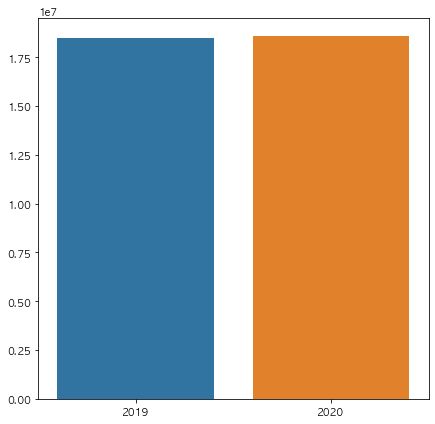

In [21]:
total = [len_2019,len_2020]
x = [2019,2020]
plt.figure(figsize=(7,7))
sns.barplot(x,total)

# 서울 전체의 따릉이 이용건수
- 19년 total :   18,474,871건 
- 20년 total :   18,570,545건

- 코로나로 인한 따릉이 사용량은 아주 약간 증가함.

# 2019년,2020년 월별 이용 그래프

In [23]:
monthly_2019 = []
for i in totla_files_2019:
    monthly_2019.append(len(i))
monthly_2020 = []
for i in totla_files_2020:
    monthly_2020.append(len(i))
M = [1,2,3,4,5,6,7,8,9,10,11,12]

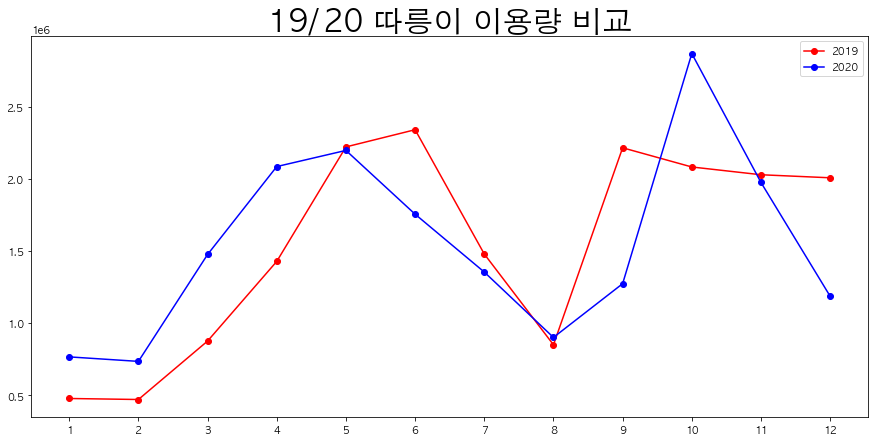

In [42]:
plt.figure(figsize=(15,7))
plt.xticks(range(0, 10))
plt.plot(M,monthly_2019,'ro-',label='2019')
plt.plot(M,monthly_2020,'bo-',label='2020')
plt.title('19/20 따릉이 이용량 비교', fontsize=30)
plt.legend(loc=1,)
plt.xticks(M)
plt.show()

# 시간대 컬럼 추가 함수

In [101]:
def add_time(df):
    time = []
    T = []
    for i in list(df['rent_date_time'].str.split(' ')):
        time.append(i[1])
    for j in time:
        T.append(j[:2])
    
    df['time'] = T
    return df

In [103]:
for o in totla_files_2019:
    add_time(o)
for o in totla_files_2020:
    add_time(o)

In [125]:
TIME_2019 = []
TIME_2020 = []
for i in totla_files_2019:
    TIME_2019.append(i.groupby(i['time']).count())
for j in totla_files_2020:
    TIME_2020.append(j.groupby(j['time']).count())

In [126]:
# 2019년 시간별 이용량 데이터 만들기
for i in range(1,12):
    TIME_2019[0] += TIME_2019[i]

In [127]:
for i in range(1,12):
    TIME_2020[0] += TIME_2020[i]

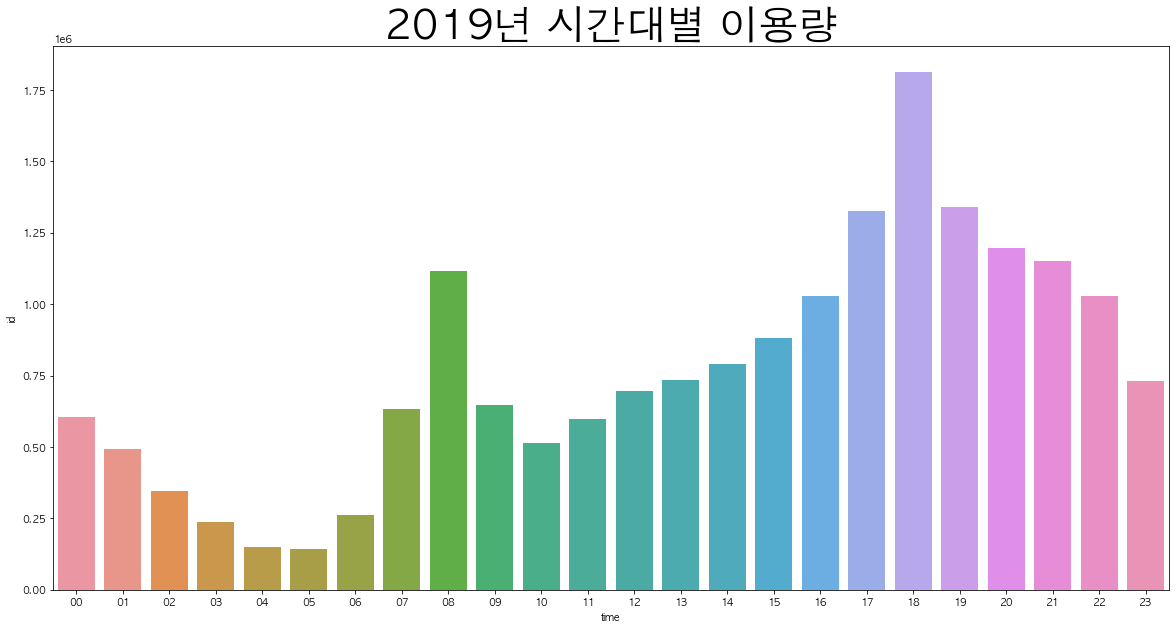

In [129]:
plt.figure(figsize=(20, 10))
sns.barplot(data=TIME_2019[0], x=TIME_2019[0].index, y="id")
plt.title('2019년 시간대별 이용량', fontsize=40)
plt.show()

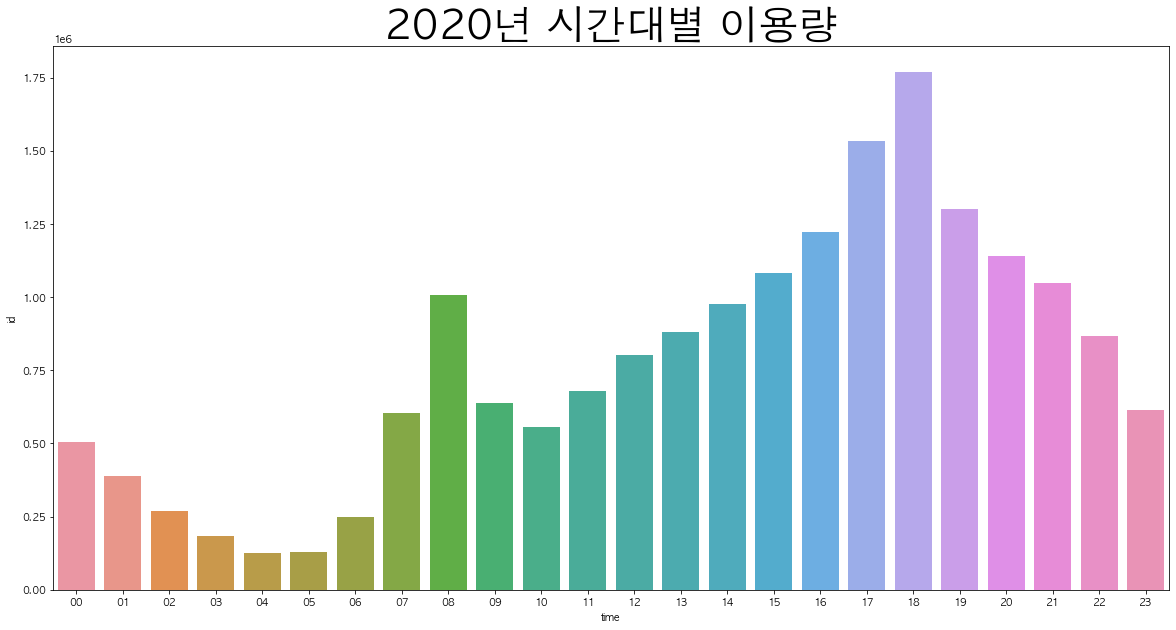

In [131]:
plt.figure(figsize=(20, 10))
sns.barplot(data=TIME_2020[0], x=TIME_2020[0].index, y="id")
plt.title('2020년 시간대별 이용량', fontsize=40)
plt.show()

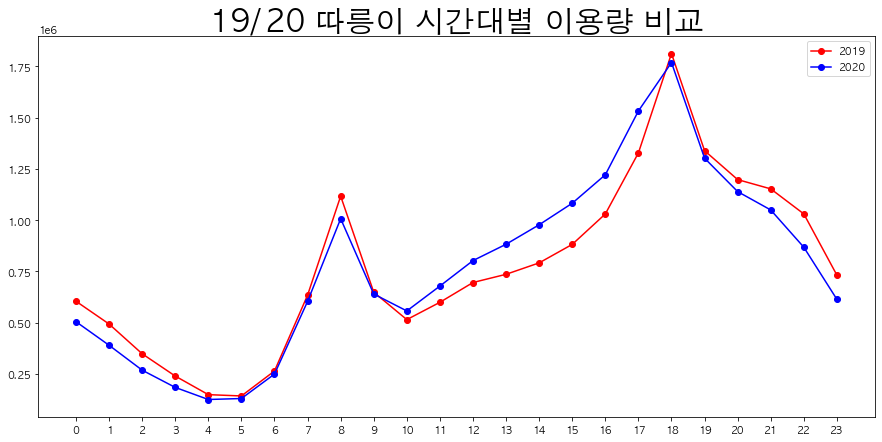

In [132]:
plt.figure(figsize=(15,7))
plt.xticks(range(0, 24))
T = range(0,24)
plt.plot(T,TIME_2019[0]['id'],'ro-',label='2019')
plt.plot(T,TIME_2020[0]['id'],'bo-',label='2020')
plt.title('19/20 따릉이 시간대별 이용량 비교', fontsize=30)
plt.legend(loc=1)
plt.xticks(T)
plt.show()

In [135]:
def weekday(df):
    tmp = []
    yo = []
    W = ['0','1','2','3','4','5','6']
    date = df['rent_date_time'].str.split(' ')
    for e in list(date):
        yo.append(e[0])
    for i in yo:
        Y = int(i[:4])
        M = int(i[5:7])
        D = int(i[8:])
        tmp.append(W[datetime.date(Y,M,D).weekday()])
    df['요일'] = tmp
    return df

In [138]:
for i in totla_files_2019:
    weekday(i)
for j in totla_files_2020:
    weekday(j)

In [140]:
DATE_2019 = []
DATE_2020 = []
for i in totla_files_2019:
    DATE_2019.append(i.groupby(i['요일']).count())
for i in totla_files_2020:
    DATE_2020.append(i.groupby(i['요일']).count())    

In [144]:
for i in range(1,len(DATE_2019)):
    DATE_2019[0] += DATE_2019[i]
for i in range(1,len(DATE_2020)):
    DATE_2020[0] += DATE_2020[i]

In [145]:
DATE_2019[0]

,bike_num,rent_date_time,id,station_name,rent_part,return_date_time,return_station_num,return_station_name,return_part,used_time,distance,time
요일,,,,,,,,,,,,
0,2733942,2733942,2733942,2733942,2733942,2733942,2733942,2733942,2733942,2733942,2733942,2733942
1,2852037,2852037,2852037,2852037,2852037,2852037,2852037,2852037,2852037,2852037,2852037,2852037
2,2642541,2642541,2642541,2642541,2642541,2642541,2642541,2642541,2642541,2642541,2642541,2642541
3,2612025,2612025,2612025,2612025,2612025,2612025,2612025,2612025,2612025,2612025,2612025,2612025
4,2739022,2739022,2739022,2739022,2739022,2739022,2739022,2739022,2739022,2739022,2739022,2739022
5,2561049,2561049,2561049,2561049,2561049,2561049,2561049,2561049,2561049,2561049,2561049,2561049
6,2334255,2334255,2334255,2334255,2334255,2334255,2334255,2334255,2334255,2334255,2334255,2334255


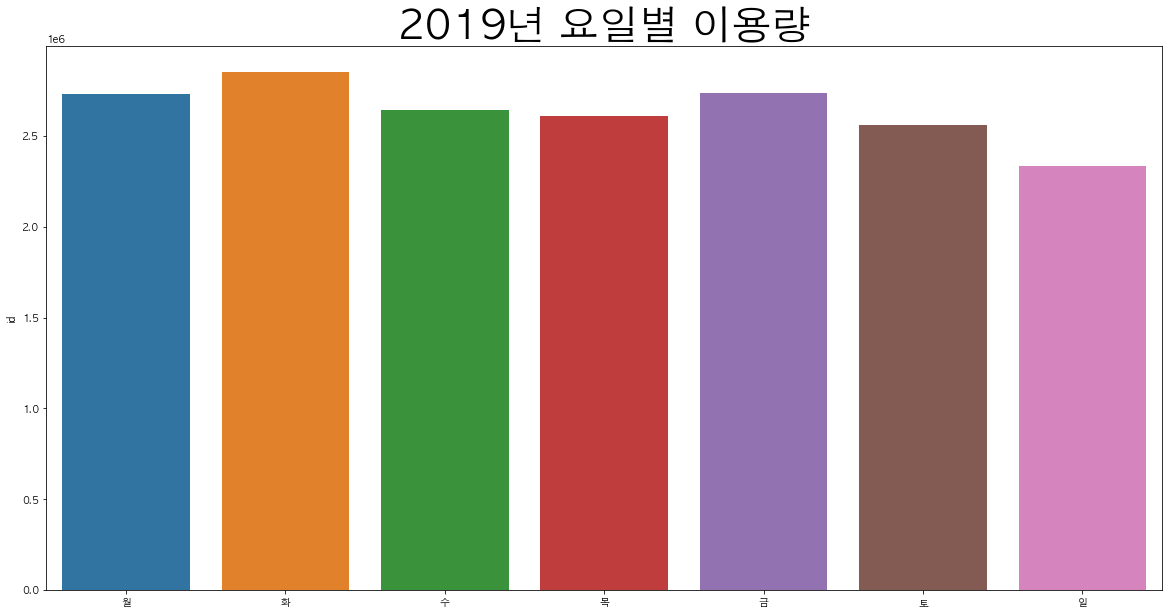

In [147]:
plt.figure(figsize=(20, 10))
sns.barplot(data=DATE_2019[0], x=['월','화','수','목','금','토','일'], y="id")
plt.title('2019년 요일별 이용량', fontsize=40)
plt.show()

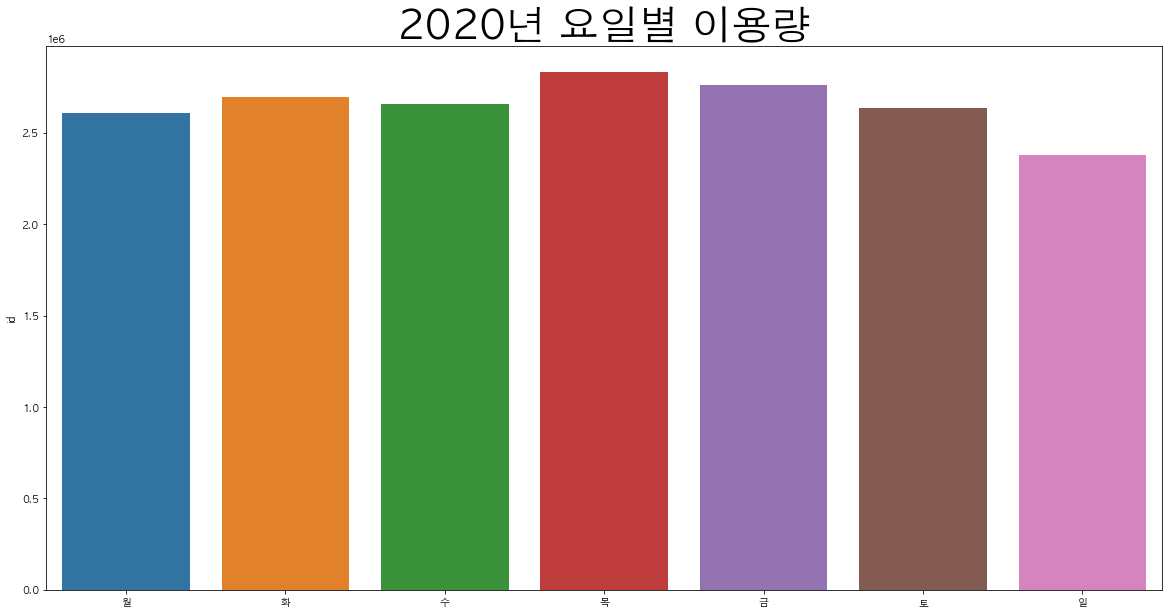

In [148]:
plt.figure(figsize=(20, 10))
sns.barplot(data=DATE_2020[0], x=['월','화','수','목','금','토','일'], y="id")
plt.title('2020년 요일별 이용량', fontsize=40)
plt.show()

In [157]:
DATE_2019[0]

,bike_num,rent_date_time,id,station_name,rent_part,return_date_time,return_station_num,return_station_name,return_part,used_time,distance,time
요일,,,,,,,,,,,,
0,2733942,2733942,2733942,2733942,2733942,2733942,2733942,2733942,2733942,2733942,2733942,2733942
1,2852037,2852037,2852037,2852037,2852037,2852037,2852037,2852037,2852037,2852037,2852037,2852037
2,2642541,2642541,2642541,2642541,2642541,2642541,2642541,2642541,2642541,2642541,2642541,2642541
3,2612025,2612025,2612025,2612025,2612025,2612025,2612025,2612025,2612025,2612025,2612025,2612025
4,2739022,2739022,2739022,2739022,2739022,2739022,2739022,2739022,2739022,2739022,2739022,2739022
5,2561049,2561049,2561049,2561049,2561049,2561049,2561049,2561049,2561049,2561049,2561049,2561049
6,2334255,2334255,2334255,2334255,2334255,2334255,2334255,2334255,2334255,2334255,2334255,2334255


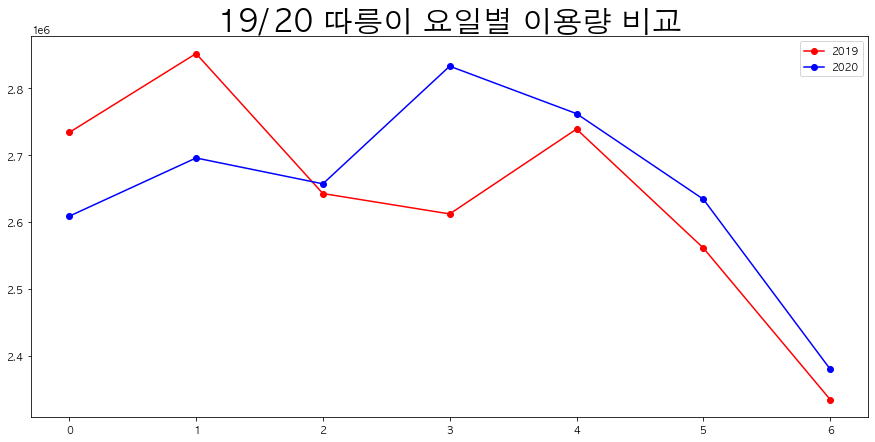

In [156]:
plt.figure(figsize=(15,7))
plt.xticks(range(0, 24))
D = ['월','화','수','목','금','토','일']
plt.plot(DATE_2019[0].index,DATE_2019[0]['id'],'ro-',label='2019')
plt.plot(DATE_2020[0].index,DATE_2020[0]['id'],'bo-',label='2020')
plt.title('19/20 따릉이 요일별 이용량 비교', fontsize=30)
plt.legend(loc=1)
plt.show()

In [162]:
totla_files_2019[0]['요일']

0         1
1         1
2         1
3         1
4         1
         ..
476753    3
476754    3
476755    3
476756    3
476757    3
Name: 요일, Length: 476758, dtype: object

In [211]:
def work_and_holiday(df):
    H = df['요일']
    tmp = []
    for i in H:
        if i =='5' or i == '6':
            tmp.append(1)
        else:
            tmp.append(0)
    df['holiday'] = tmp
    return df

In [212]:
for i in totla_files_2019:
    work_and_holiday(i)
for j in totla_files_2020:
    work_and_holiday(j)

In [213]:
totla_files_2019[0]['holiday'].unique()

array([0, 1])

In [218]:
holiday_2019 = []
holiday_2020 = []

for i in totla_files_2019:
    holiday_2019.append(i.groupby(['holiday','time']).count())
for j in totla_files_2020:
    holiday_2020.append(j.groupby(['holiday','time']).count())

In [221]:
for i in range(1,len(holiday_2019)):
    holiday_2019[0] += holiday_2019[i]
for j in range(1,len(holiday_2020)):
    holiday_2020[0] += holiday_2020[j]

In [248]:
work_2019 = holiday_2019[0].iloc[:24]
holiday_2019 = holiday_2019[0].iloc[24:]

work_2020 = holiday_2020[0].iloc[:24]
holiday_2020 = holiday_2020[0].iloc[24:]


KeyError: 0

In [245]:
work_2019.index = k

In [250]:
work_2020

bike_num  rent_date_time       id  station_name  rent_part  \
holiday time                                                               
0       00      341564          341564   341564        341564     341564   
        01      261075          261075   261075        261075     261075   
        02      176029          176029   176029        176029     176029   
        03      119611          119611   119611        119611     119611   
        04       83796           83796    83796         83796      83796   
        05       97946           97946    97946         97946      97946   
        06      209202          209202   209202        209202     209202   
        07      538434          538434   538434        538434     538434   
        08      897900          897900   897900        897900     897900   
        09      496656          496656   496656        496656     496656   
        10      381390          381390   381390        381390     381390   
        11      465131          465131   465131        465131     465131   
        12      541363          541363   541363        541363     541363   
        13      572174          572174   572174        572174     572174   
        14      624281          624281   624281        624281     624281   
        15      700403          700403   700403        700403     700403   
        16      825321          825321   825321        825321     825321   
        17     1140116         1140116  1140116       1140116    1140116   
        18     1412865         1412865  1412865       1412865    1412865   
        19      983348          983348   983348        983348     983348   
        20      836634          836634   836634        836634     836634   
        21      769202          769202   769202        769202     769202   
        22      637405          637405   637405        637405     637405   
        23      444903          444903   444903        444903     444903   

              return_date_time  return_station_num  return_station_name  \
holiday time                                                              
0       00              341564              341564               341564   
        01              261075              261075               261075   
        02              176029              176029               176029   
        03              119611              119611               119611   
        04               83796               83796                83796   
        05               97946               97946                97946   
        06              209202              209202               209202   
        07              538434              538434               538434   
        08              897900              897900               897900   
        09              496656              496656               496656   
        10              381390              381390               381390   
        11              465131              465131               465131   
        12              541363              541363               541363   
        13              572174              572174               572174   
        14              624281              624281               624281   
        15              700403              700403               700403   
        16              825321              825321               825321   
        17             1140116             1140116              1140116   
        18             1412865             1412865              1412865   
        19              983348              983348               983348   
        20              836634              836634               836634   
        21              769202              769202               769202   
        22              637405              637405               637405   
        23              444903              444903               444903   

              return_part  used_time  distance       요일  
holiday time                

In [251]:
work_2020.index = k

In [252]:
work_2020

,bike_num,rent_date_time,id,station_name,rent_part,return_date_time,return_station_num,return_station_name,return_part,used_time,distance,요일
0,341564,341564,341564,341564,341564,341564,341564,341564,341564,341564,341561,341564
1,261075,261075,261075,261075,261075,261075,261075,261075,261075,261075,261071,261075
2,176029,176029,176029,176029,176029,176029,176029,176029,176029,176029,176026,176029
3,119611,119611,119611,119611,119611,119611,119611,119611,119611,119611,119610,119611
4,83796,83796,83796,83796,83796,83796,83796,83796,83796,83796,83796,83796
5,97946,97946,97946,97946,97946,97946,97946,97946,97946,97946,97946,97946
6,209202,209202,209202,209202,209202,209202,209202,209202,209202,209202,209198,209202
7,538434,538434,538434,538434,538434,538434,538434,538434,538434,538434,538431,538434
8,897900,897900,897900,897900,897900,897900,897900,897900,897900,897900,897893,897900
9,496656,496656,496656,496656,496656,496656,496656,496656,496656,496656,496653,496656


In [254]:
holiday_2019.index = k
holiday_2020.index = k

In [258]:
work_2019 = work_2019 / 5 * 2
work_2020 = work_2020 / 5 * 2

In [244]:
k = range(0,24)

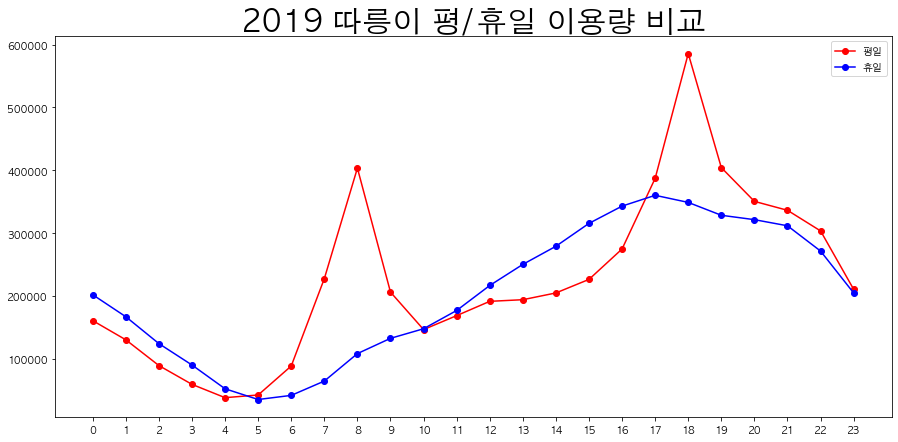

In [263]:
plt.figure(figsize=(15,7))
plt.xticks(range(0, 24))
plt.plot(work_2019.index,work_2019['id'],'ro-',label='평일')
plt.plot(holiday_2019.index,holiday_2019['id'],'bo-',label='휴일')
plt.title('2019 따릉이 평/휴일 이용량 비교', fontsize=30)
plt.legend(loc=1)
plt.show()

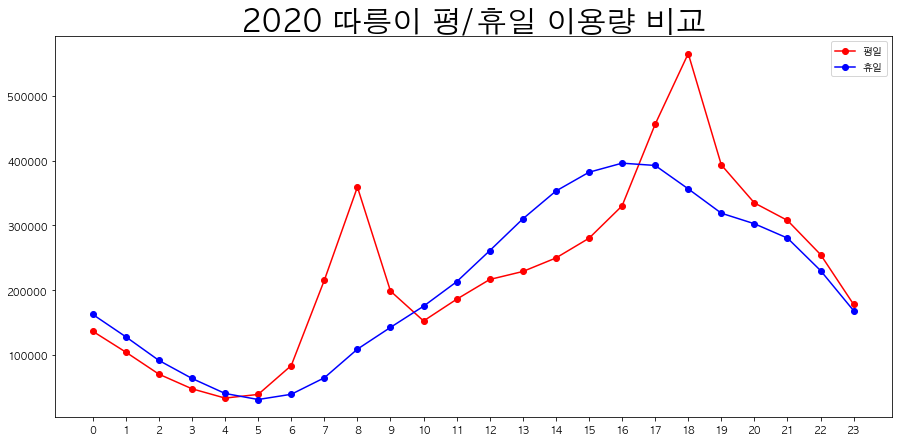

In [270]:
plt.figure(figsize=(15,7))
plt.xticks(range(0, 24))
plt.plot(work_2020.index,work_2020['id'],'ro-',label='평일')
plt.plot(holiday_2020.index,holiday_2020['id'],'bo-',label='휴일')
plt.title('2020 따릉이 평/휴일 이용량 비교', fontsize=30)
plt.legend(loc=1)
plt.show()

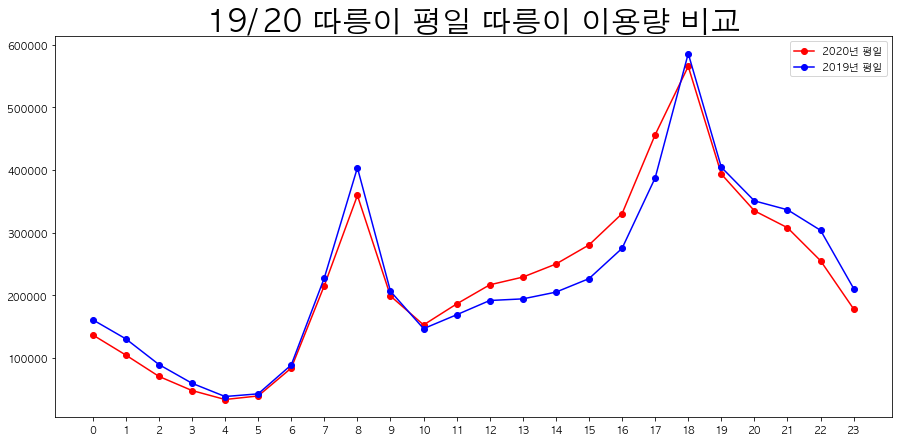

In [271]:
plt.figure(figsize=(15,7))
plt.xticks(range(0, 24))
plt.plot(work_2020.index,work_2020['id'],'ro-',label='2020년 평일')
plt.plot(work_2019.index,work_2019['id'],'bo-',label='2019년 평일')
plt.title('19/20 따릉이 평일 따릉이 이용량 비교', fontsize=30)
plt.legend(loc=1)
plt.show()

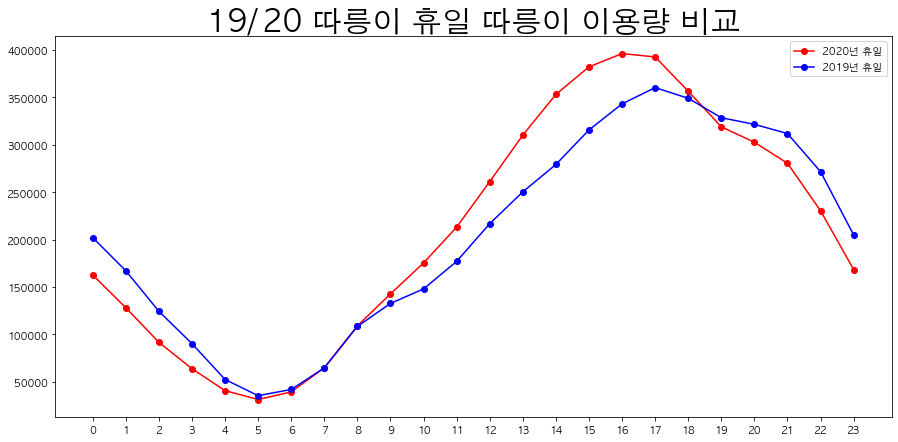

In [272]:
plt.figure(figsize=(15,7))
plt.xticks(range(0, 24))
plt.plot(holiday_2020.index,holiday_2020['id'],'ro-',label='2020년 휴일')
plt.plot(holiday_2019.index,holiday_2019['id'],'bo-',label='2019년 휴일')
plt.title('19/20 따릉이 휴일 따릉이 이용량 비교', fontsize=30)
plt.legend(loc=1)
plt.show()

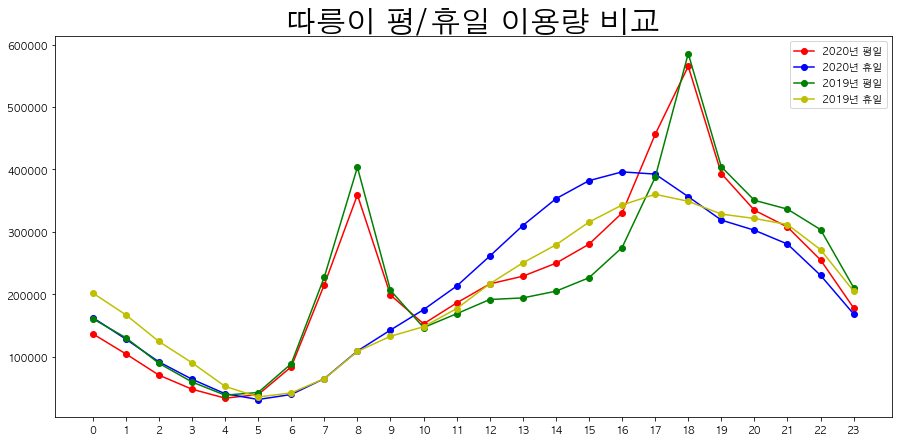

In [269]:
plt.figure(figsize=(15,7))
plt.xticks(range(0, 24))
plt.plot(work_2020.index,work_2020['id'],'ro-',label='2020년 평일')
plt.plot(holiday_2020.index,holiday_2020['id'],'bo-',label='2020년 휴일')
plt.plot(work_2019.index,work_2019['id'],'go-',label='2019년 평일')
plt.plot(holiday_2019.index,holiday_2019['id'],'yo-',label='2019년 휴일')
plt.title('따릉이 평/휴일 이용량 비교', fontsize=30)
plt.legend(loc=1)
plt.show()